# Global Power Plant Database

**Problem Statement:**
    
**Description**

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

**Key attributes of the database**
The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017



Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

**Prediction** :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We can see there are total 907 rows and 27 columns.Also, there are both Numerical and categorical type features available.

In [6]:
# check for missing data (np.nan/blank)
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

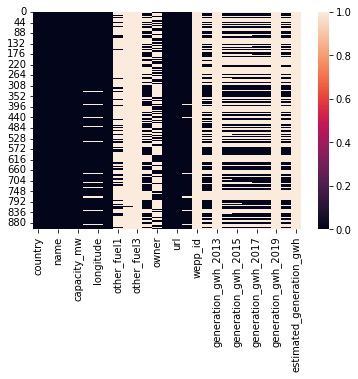

In [7]:
sns.heatmap(df.isna())

Many features are having null value.

In [8]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [9]:
for i in df.columns:
        print(df[i].value_counts())
        print('------------------------------------------')

IND    907
Name: country, dtype: int64
------------------------------------------
India    907
Name: country_long, dtype: int64
------------------------------------------
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
------------------------------------------
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
------------------------------------------
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Lengt

* country and country_long holds same data and one unique value.Therefore, we can drop these columns.
* other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh,generation_gwh_2019,generation_gwh_2013 is almost 100% going null. So, this will not impact our analysis,we can drop them.

In [10]:
df = df.drop(["country","country_long","other_fuel2", "other_fuel3","wepp_id", "generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"], axis=1)

year_of_capacity_data and generation_data_source has only one unique value, so we can drop them.

In [11]:
df = df.drop(["year_of_capacity_data","generation_data_source"], axis=1)

In [12]:
#Droping few other unnecessary columns
df = df.drop(["name","gppd_idnr","url","owner"], axis=1)

In [13]:
df.shape

(907, 13)

Now we need to work on the null values.

In [14]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [15]:
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(), inplace= True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(), inplace= True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace= True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace= True)
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(), inplace= True)

In [16]:
df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True) 

In [17]:
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)

In [18]:
# check for missing data (np.nan/blank)
df.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

# EDA (Exploratory Data Analysis):

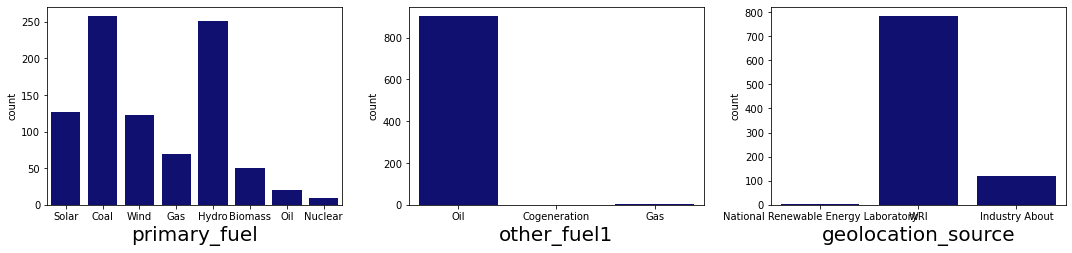

In [19]:
# checking for categorical columns
categorical_col=["primary_fuel","other_fuel1","geolocation_source"]

plt.figure(figsize=(15,10))
plotnumber=1
for column in categorical_col:
    if plotnumber<=3:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[column],color="navy")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


From above plots, we can observe:
* Most of the plants in India, uses Coal and hydro as primary fuel.
* Most of the plants are using oil as other fuel.
* Source of most of the plants is WRI and National Renewable energy Laboratory has very negligible value.

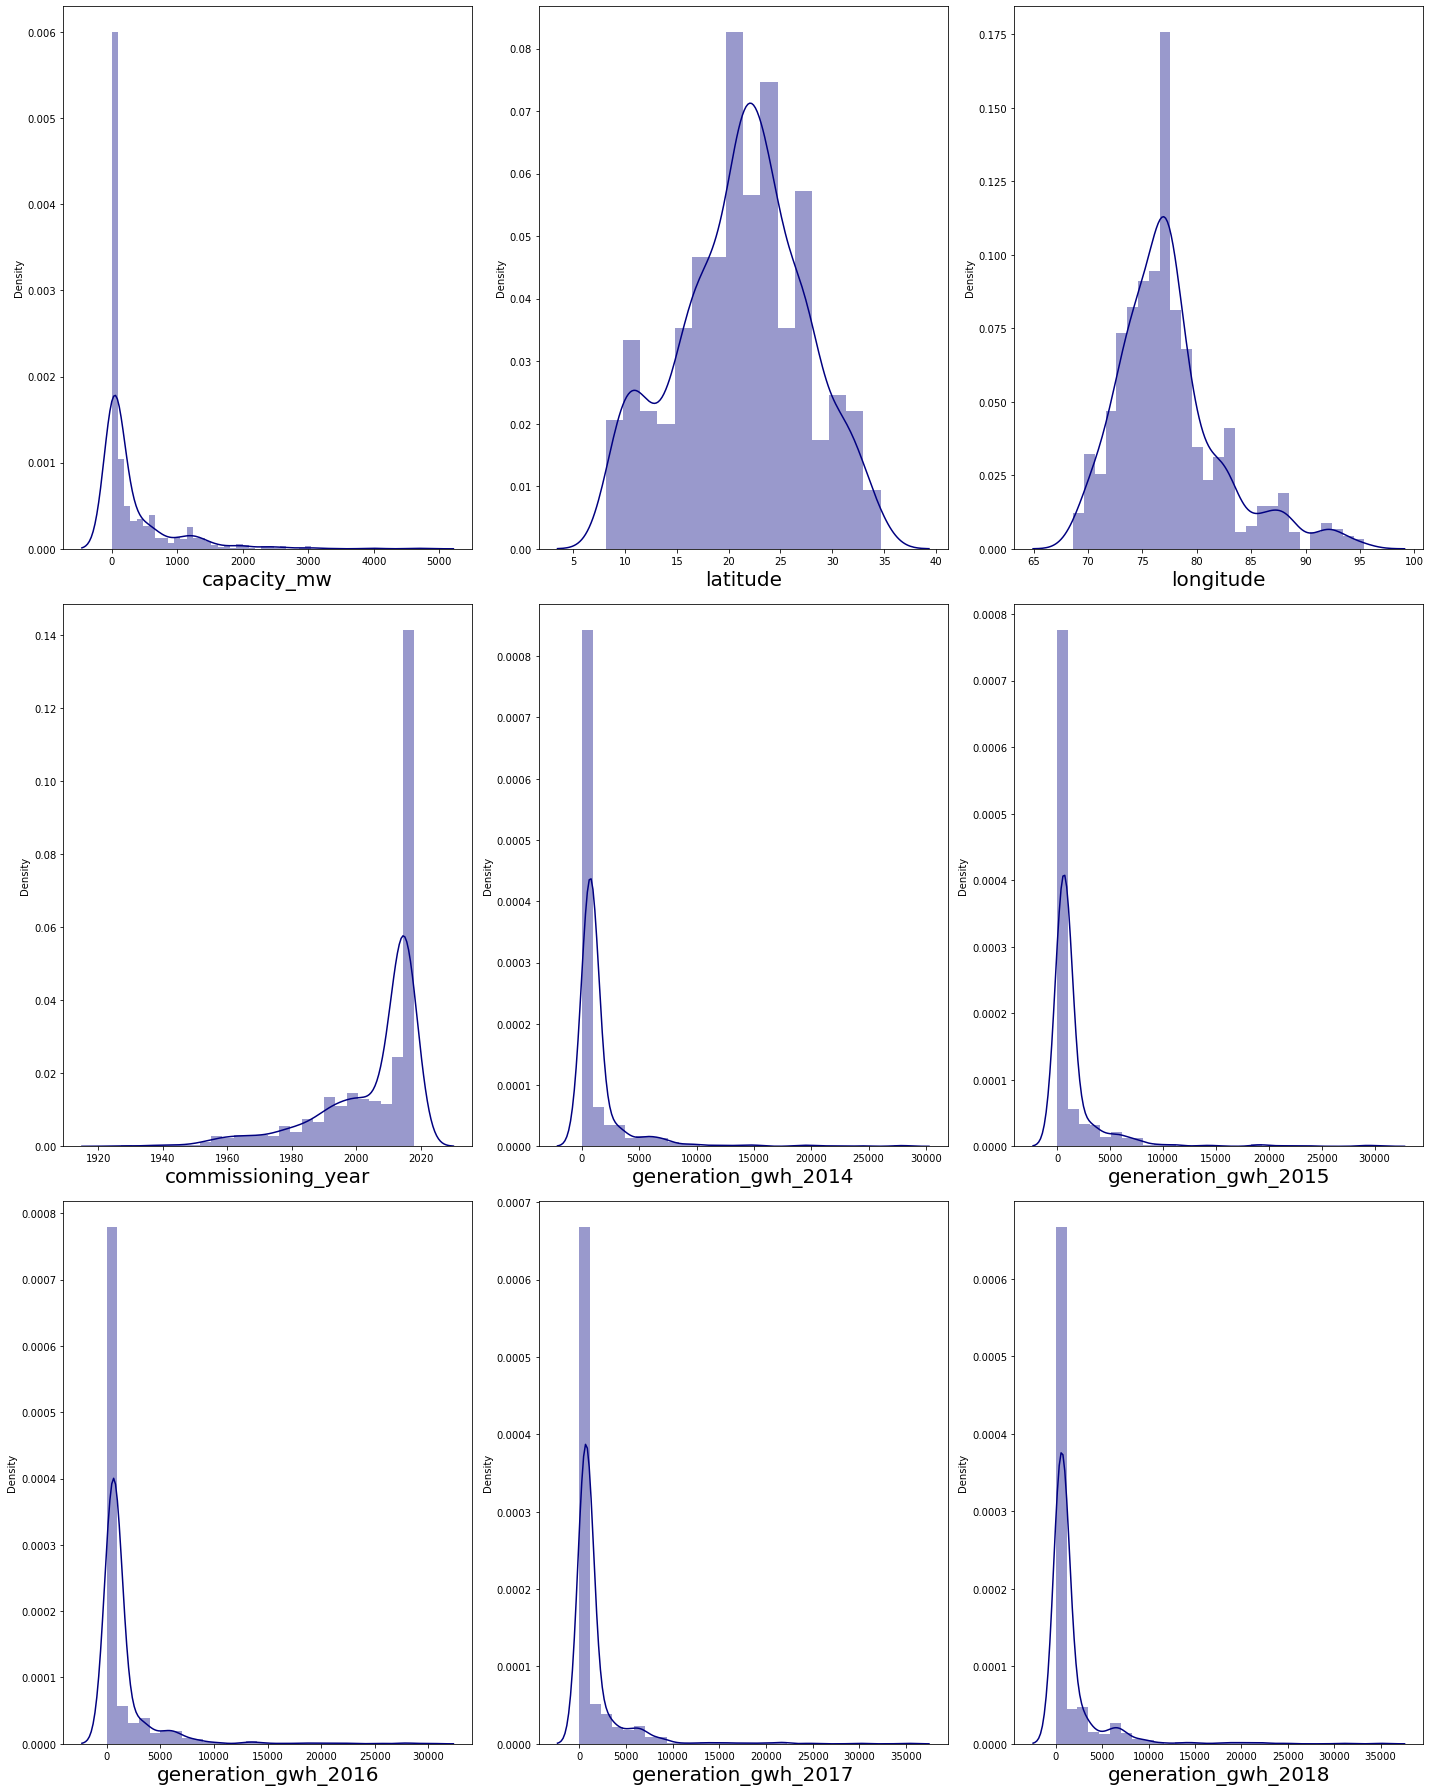

In [20]:
# Checking how the data has been distriubted in each column

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="navy")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


We can see skewness is present in the dataset.

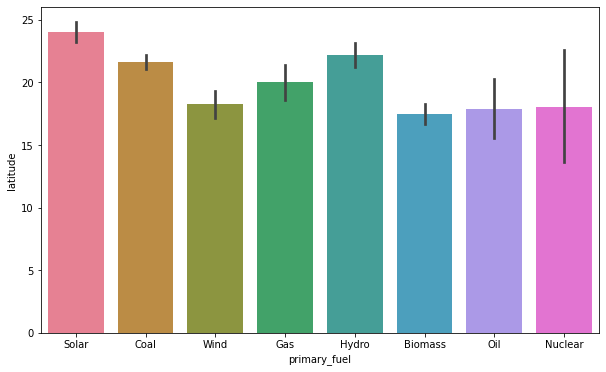

In [21]:
plt.figure(figsize=[10,6])
sns.barplot(df['primary_fuel'],df["latitude"],palette="husl");

The fuel type Solar has high latitude followed by Hydro, Coal and Gas and others.

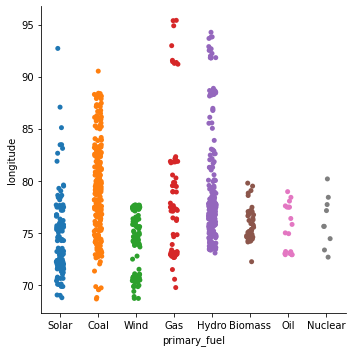

In [22]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

From longitude we can see the primary fule is coal and hydro.

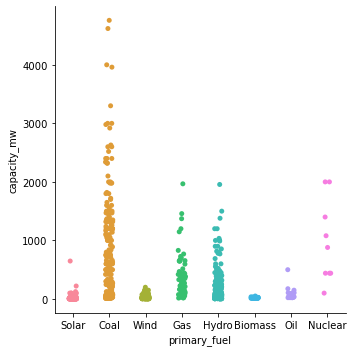

In [23]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

We can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

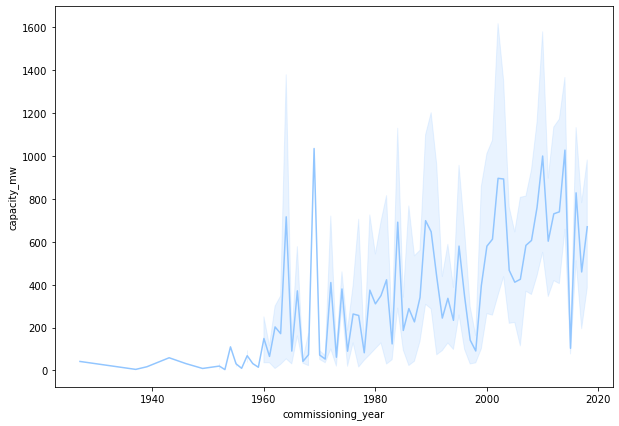

In [24]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='commissioning_year',y='capacity_mw')
plt.show()

Here we can see, the development of plants and capcaity incresed across years.

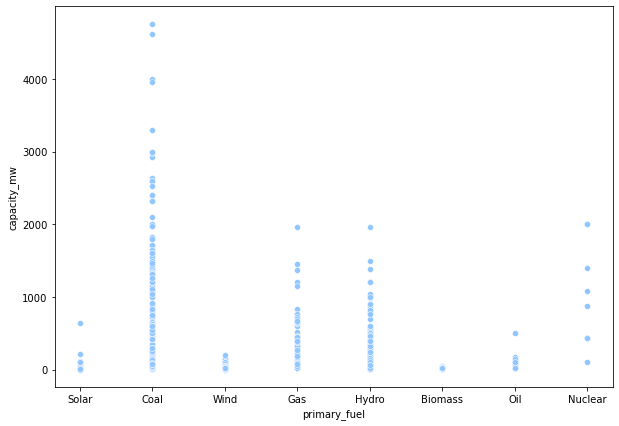

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')
plt.show()

We can see most of the power capacity is due to coal.

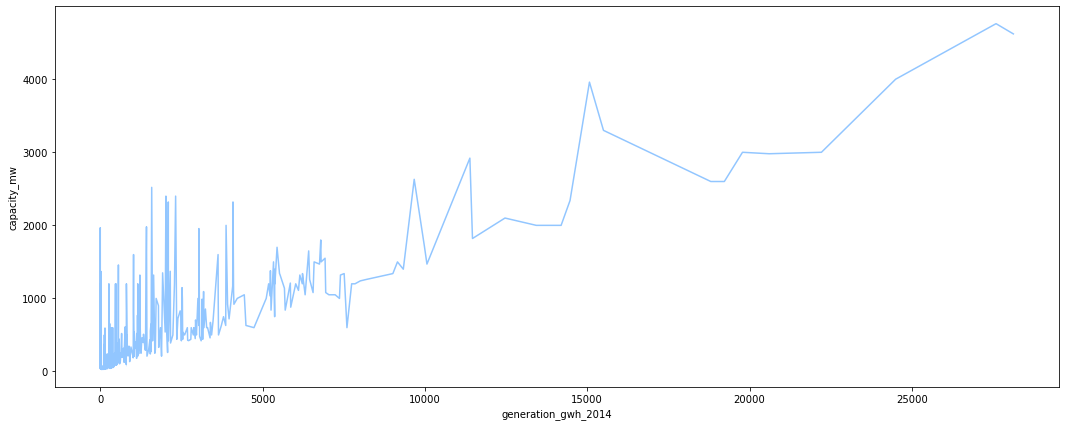

In [26]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2014',y='capacity_mw')
plt.show()

With higher capacity, generation_gwh_2014 is incresing.

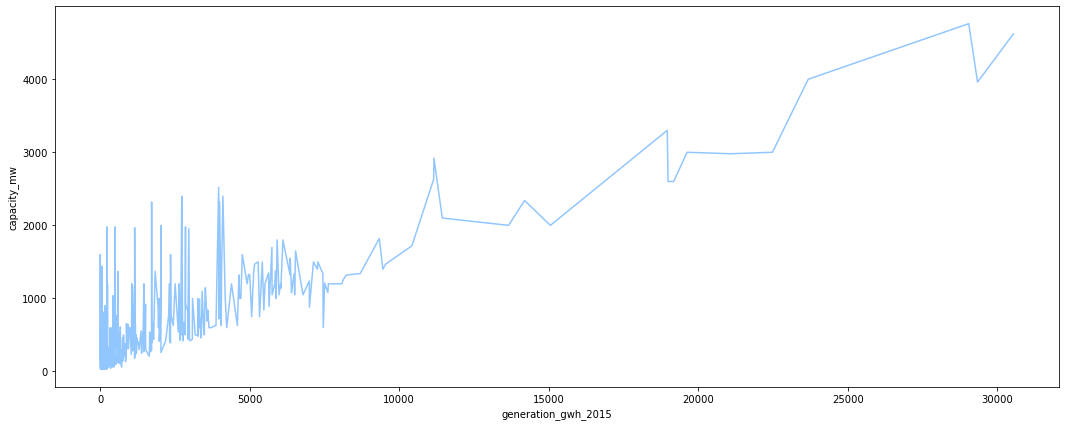

In [27]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2015',y='capacity_mw')
plt.show()

With higher capacity, generation_gwh_2015 is increasing.

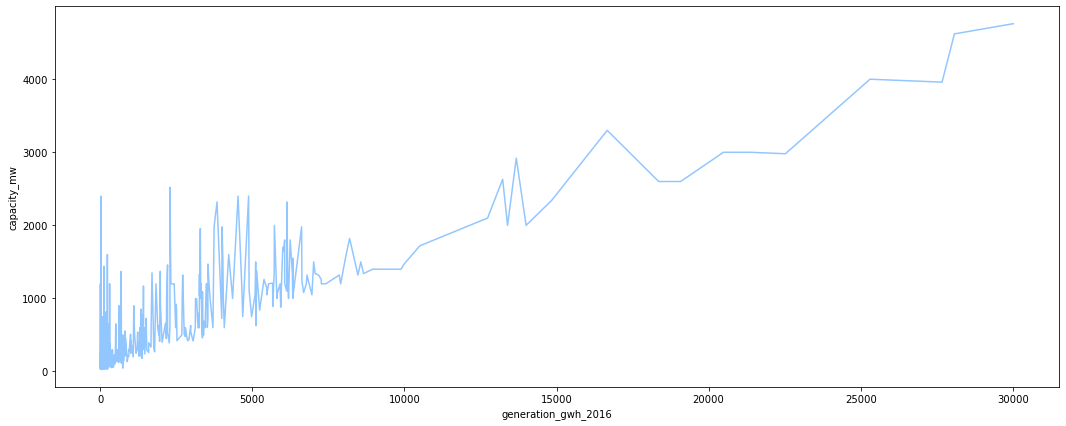

In [28]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2016',y='capacity_mw')
plt.show()

With higher capacity, generation_gwh_2016 is increasing.

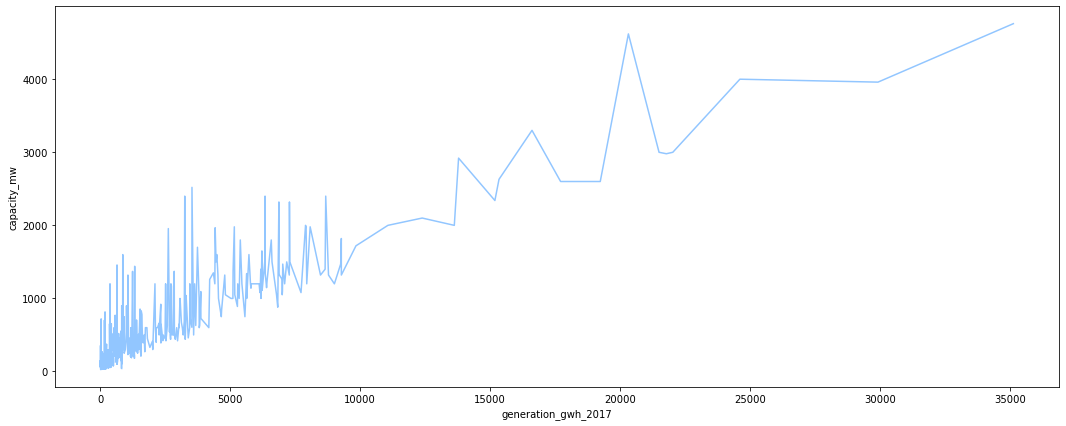

In [29]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2017',y='capacity_mw')
plt.show()

With higher capacity, generation_gwh_2017 is increasing.

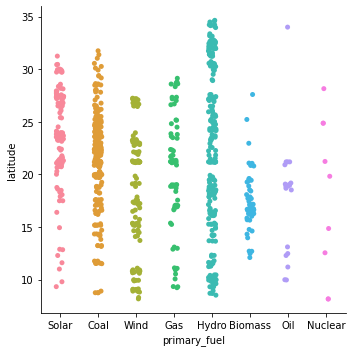

In [30]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

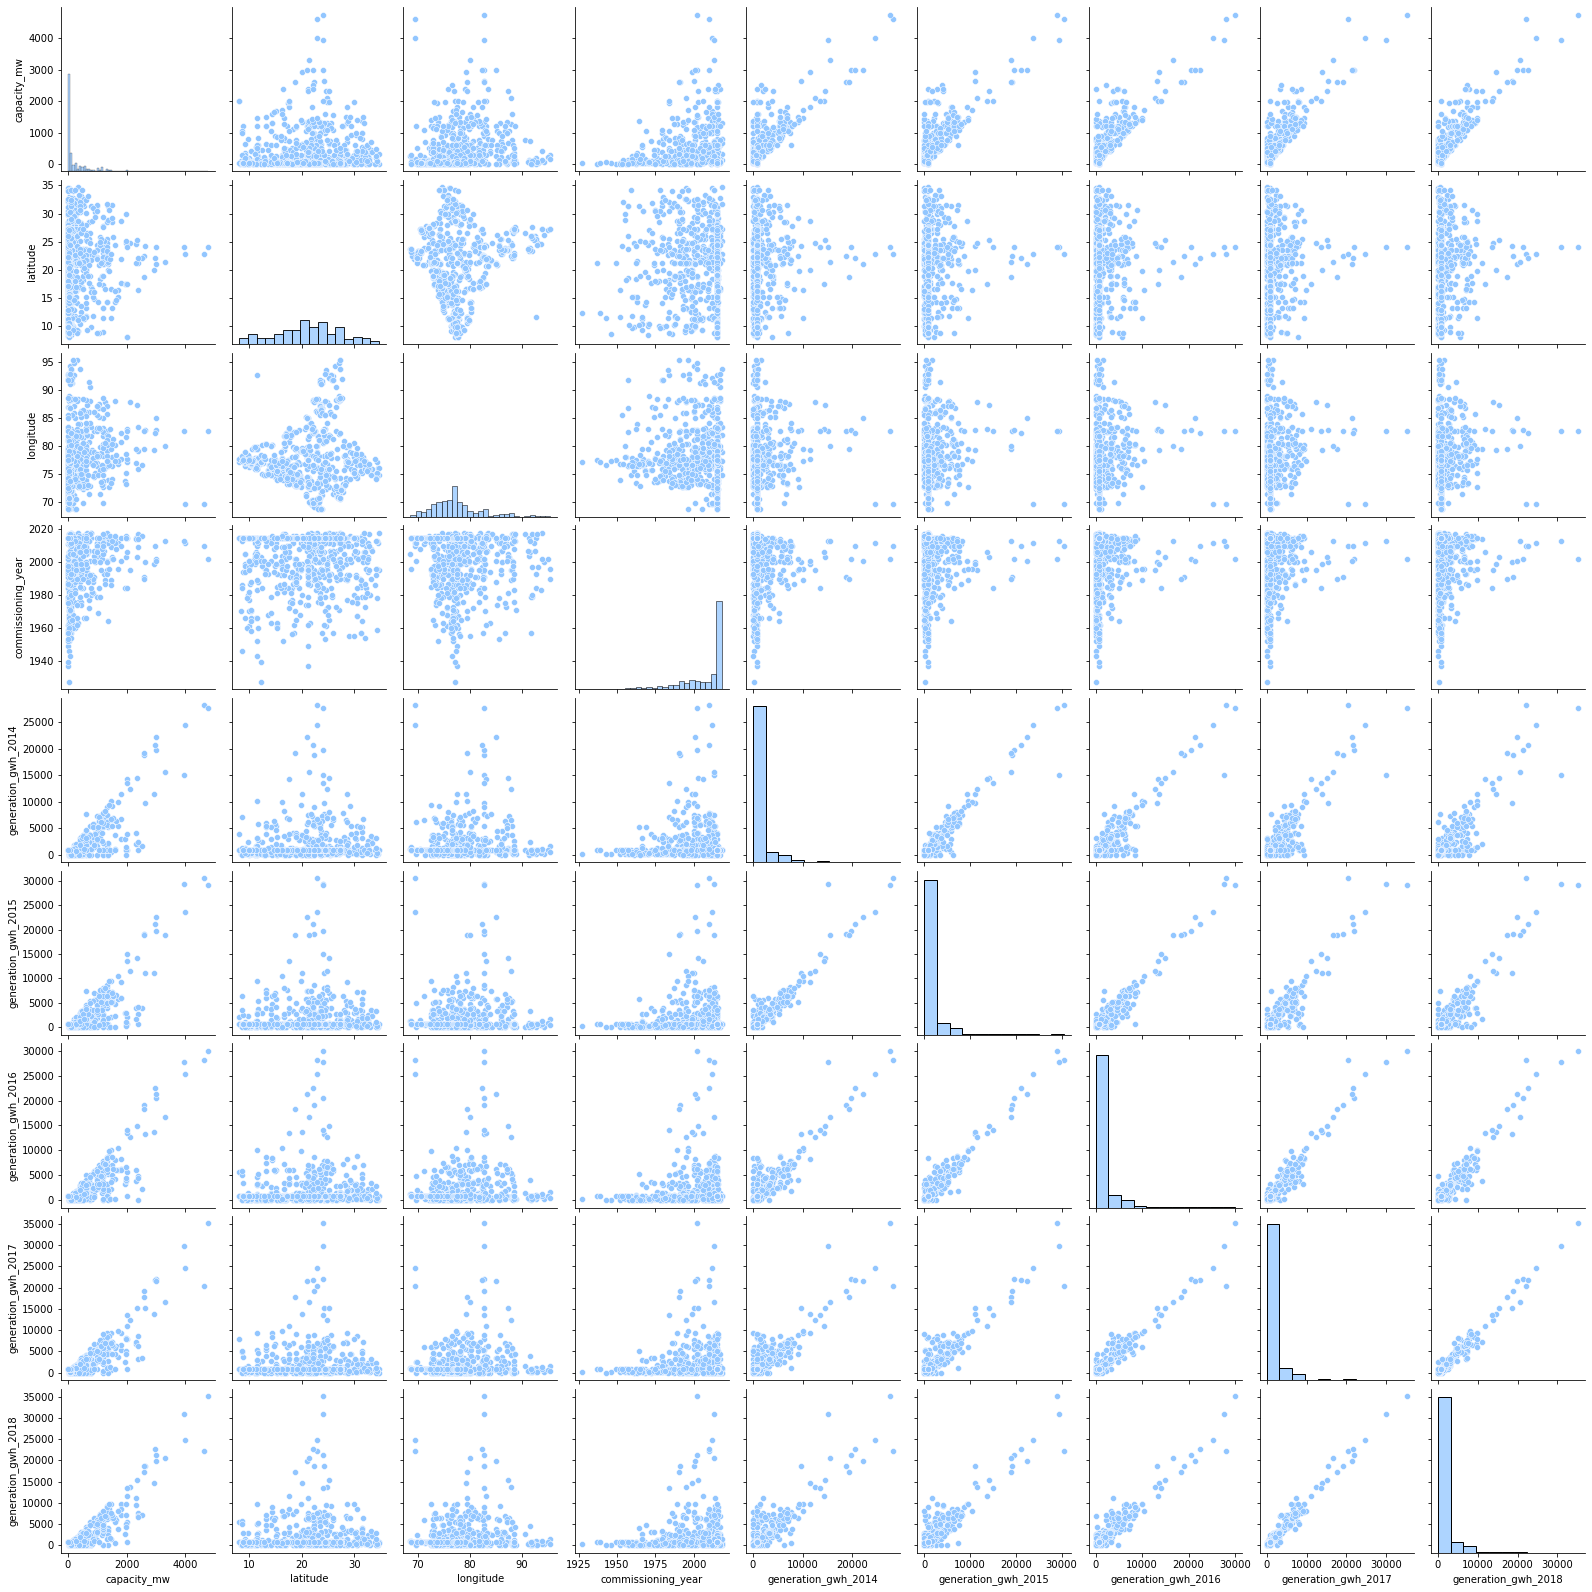

In [31]:
sns.pairplot(df)

In [32]:
# Since commissioning_year is not playing an important role, we are dropping this feature
df.drop(columns=["commissioning_year"],inplace=True)

# Outlier

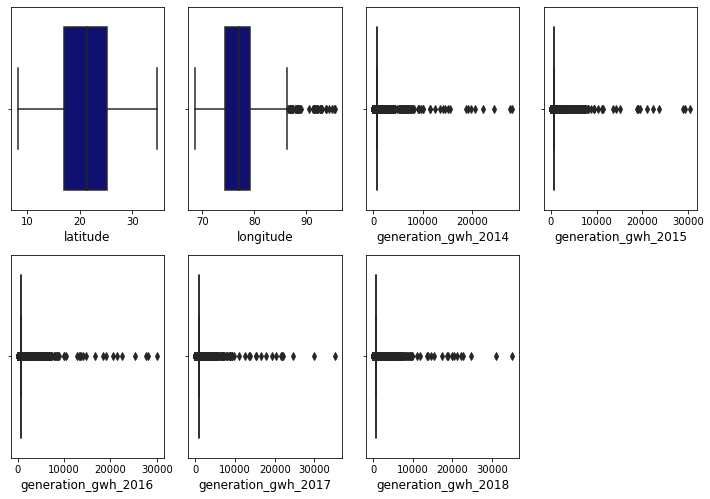

In [33]:
numeric=['latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numeric:
    if plotnumber<=9:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],color="navy")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can see outliers present in the dataset.

In [34]:
# Features containing outliers
features = df[['longitude',  'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018']]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.878280,0.257022,0.267783,0.275737,0.275565,0.288394
1,0.593788,0.257022,0.267783,0.275737,0.275565,0.288394
2,1.682394,0.257022,0.267783,0.275737,0.275565,0.288394
3,2.889052,0.322873,0.223348,0.226194,0.326203,0.327990
4,1.027976,0.545554,1.476964,1.557432,1.224379,1.772608
...,...,...,...,...,...,...
902,0.022477,0.257022,0.505833,0.443415,0.259992,0.308963
903,0.145644,0.257022,0.267783,0.275737,0.275565,0.288394
904,0.391673,0.257022,0.267783,0.275737,0.275565,0.288394
905,0.772866,0.257022,0.267783,0.275737,0.275565,0.288394


In [35]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [36]:
# Shape of original dataset
df.shape

(907, 12)

In [37]:
# Shape of new dataset
df_new.shape

(871, 12)

# Percentage Data Loss:

In [38]:
# Checking the the data loss
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

3.9691289966923926

# Encoder

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['primary_fuel'] = le.fit_transform(df_new['primary_fuel'])
df_new['geolocation_source'] = le.fit_transform(df_new['geolocation_source'])
df_new['source'] = le.fit_transform(df_new['source'])
df_new['other_fuel1'] = le.fit_transform(df_new['other_fuel1'])

In [40]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Correlation:

In [41]:
df_new.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.049673,0.243827,-0.395254,-0.002436,-0.267822,0.228364,0.621908,0.682360,0.751083,0.789699,0.815824
latitude,0.049673,1.000000,-0.008400,-0.002550,0.036313,0.067632,-0.198671,0.081717,0.071577,0.058038,0.071876,0.065097
longitude,0.243827,-0.008400,1.000000,-0.373974,0.029823,-0.239676,0.267116,0.110169,0.144423,0.184950,0.185588,0.193526
primary_fuel,-0.395254,-0.002550,-0.373974,1.000000,0.006313,0.039778,-0.478696,-0.247999,-0.274218,-0.284447,-0.286974,-0.296262
other_fuel1,-0.002436,0.036313,0.029823,0.006313,1.000000,0.027734,-0.022260,-0.001148,0.005467,0.014815,0.011173,0.022038
source,-0.267822,0.067632,-0.239676,0.039778,0.027734,1.000000,-0.500208,-0.135034,-0.149922,-0.152047,-0.149500,-0.158883
geolocation_source,0.228364,-0.198671,0.267116,-0.478696,-0.022260,-0.500208,1.000000,0.108379,0.120329,0.122034,0.119989,0.127521
generation_gwh_2014,0.621908,0.081717,0.110169,-0.247999,-0.001148,-0.135034,0.108379,1.000000,0.912697,0.802435,0.747718,0.739556
generation_gwh_2015,0.682360,0.071577,0.144423,-0.274218,0.005467,-0.149922,0.120329,0.912697,1.000000,0.908512,0.831409,0.822716
generation_gwh_2016,0.751083,0.058038,0.184950,-0.284447,0.014815,-0.152047,0.122034,0.802435,0.908512,1.000000,0.933125,0.914193


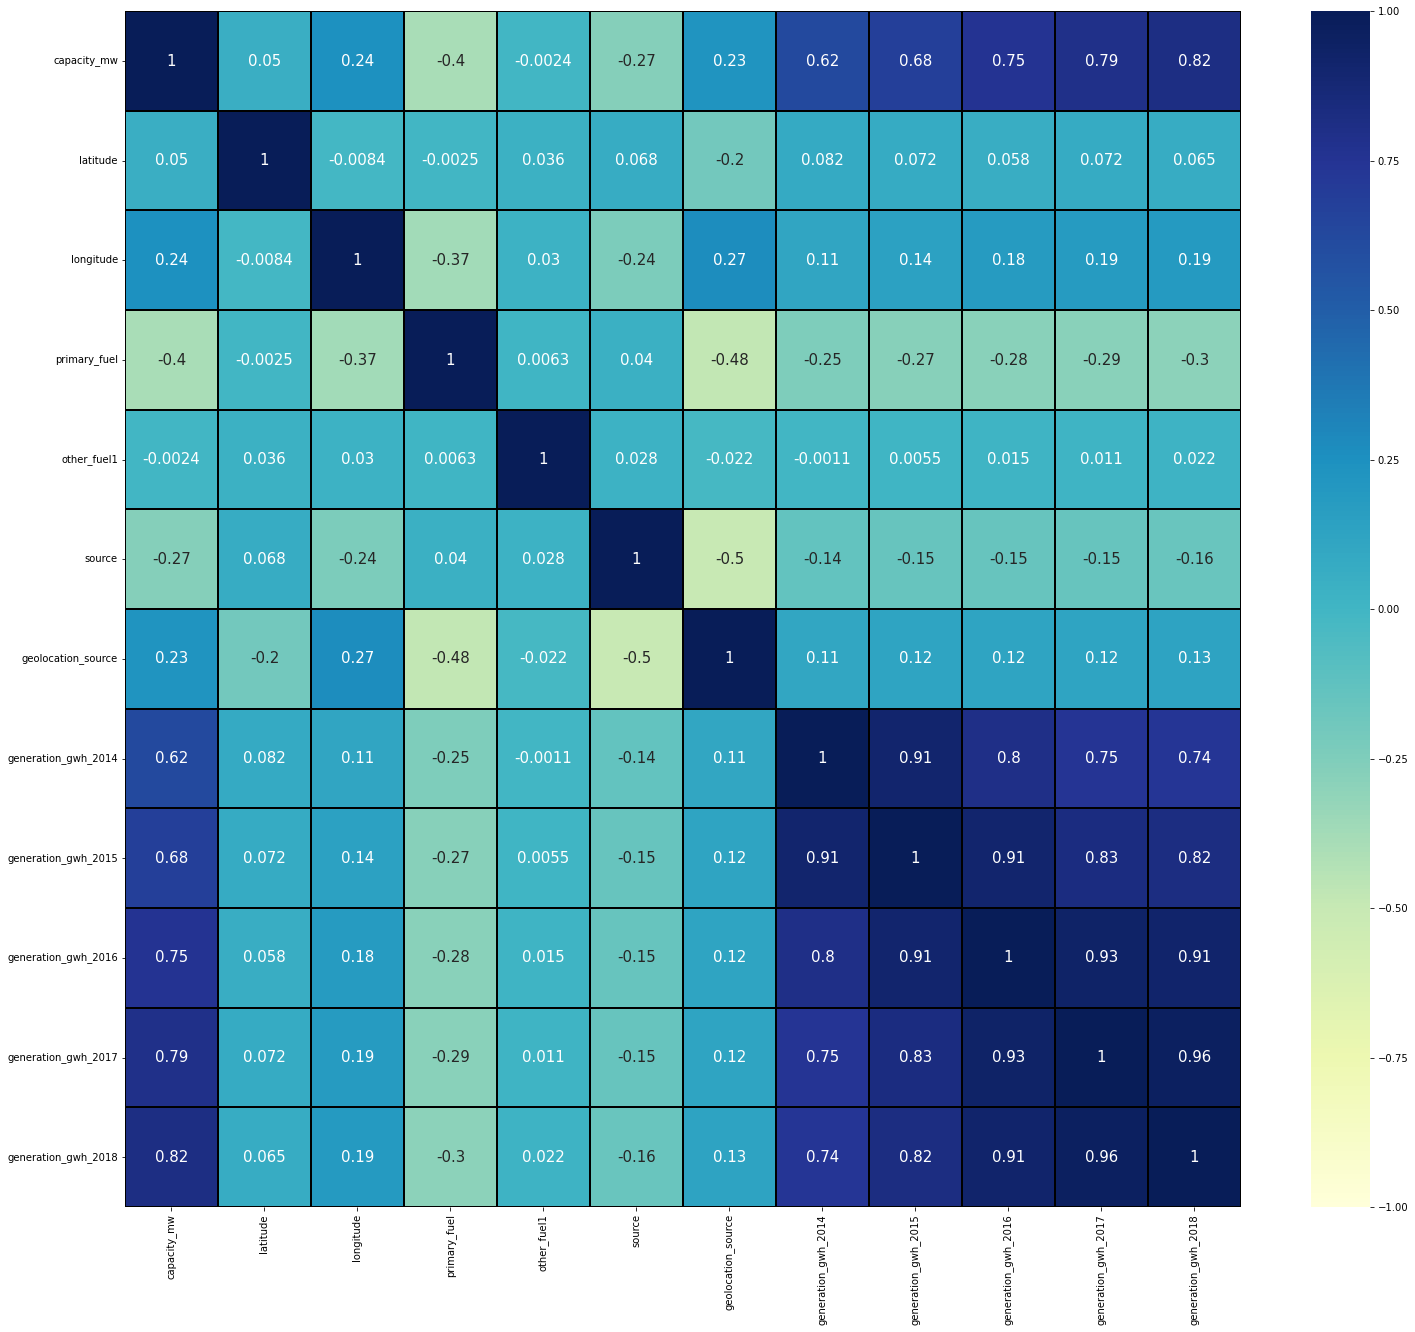

In [42]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

Here we can notice generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 are positively correlated to capacity_mw and latitude is negative correlated.

# Skewness

In [43]:
df_new.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,272.935409,21.109256,77.099245,3.261768,1.995408,44.649828,1.724455,1199.132673,1169.166730,1222.638997,1315.937274,1309.371032
std,445.363834,6.134018,4.311587,2.299005,0.082918,45.283249,0.686377,1475.969700,1529.718106,1598.745682,1667.941302,1757.801754
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.250000,16.924300,74.329400,1.000000,2.000000,22.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,50.400000,21.208300,76.781700,3.000000,2.000000,22.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,325.000000,25.134100,78.928400,6.000000,2.000000,37.500000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
max,2520.000000,34.649000,91.823900,7.000000,2.000000,190.000000,2.000000,9335.000000,9453.000000,9887.200000,9271.610000,9859.500000


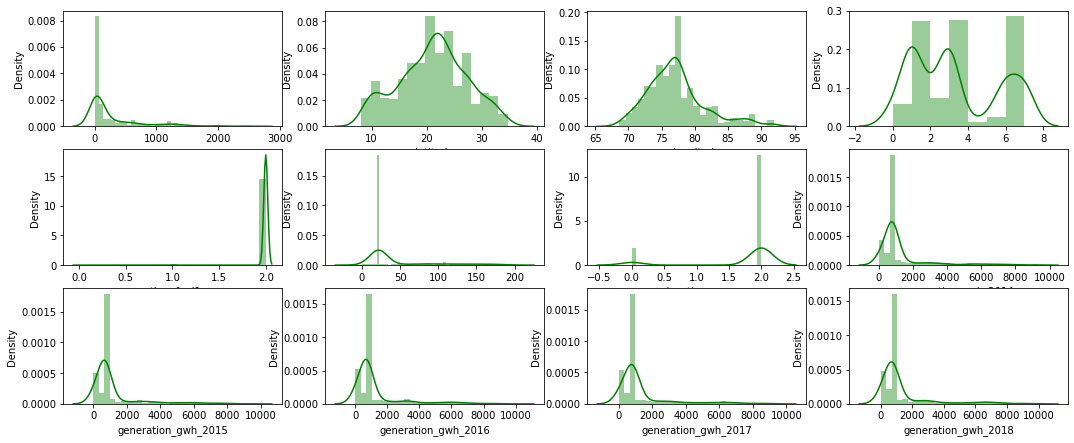

In [44]:
plt.figure(figsize=(18,20))
for i in enumerate(df_new):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df_new[i[1]],color='g')

In [45]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

# i) capacity_mw

In [46]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df_new.drop(['capacity_mw'], axis=1)
y=df_new['capacity_mw']
df2=pd.DataFrame(x,columns=x.columns)

x=power_transform(x, method='yeo-johnson')

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.15902914, -0.94251935,  1.14584255, ..., -0.03180053,
        -0.02121617, -0.04501298],
       [ 0.59208084, -0.52236203, -1.01131189, ..., -0.03180053,
        -0.02121617, -0.04501298],
       [ 0.12088435, -2.38389273,  1.42214149, ..., -0.03180053,
        -0.02121617, -0.04501298],
       ...,
       [-0.95486367, -0.24766131,  1.42214149, ..., -0.03180053,
        -0.02121617, -0.04501298],
       [ 0.52333628, -0.78203078, -1.01131189, ..., -0.03180053,
        -0.02121617, -0.04501298],
       [-1.80174746,  0.23745683,  1.42214149, ..., -0.03180053,
        -0.02121617, -0.04501298]])

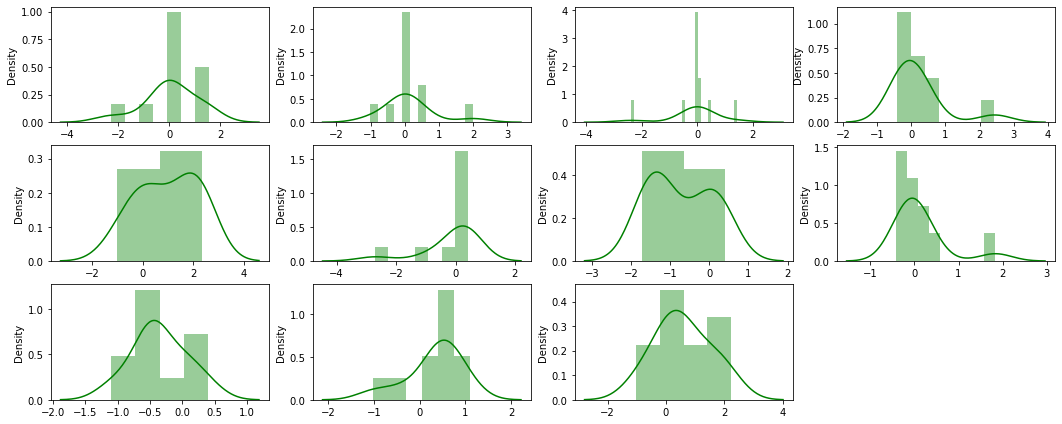

In [48]:
plt.figure(figsize=(18,20))
for i in enumerate(pd.DataFrame(x)):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(pd.DataFrame(x[i[1]]),color='g')

We can see skewness is removed, let's check the multicolinearity.

# VIF calculation

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(pd.DataFrame(x).values,i) for i in range(pd.DataFrame(x).shape[1])]
    vif["features"]=df2.columns
    print(vif)
    
vif_calc()  

    VIF Factor             features
0     1.068522             latitude
1     1.247552            longitude
2     1.609241         primary_fuel
3     1.038074          other_fuel1
4     1.346773               source
5     1.737543   geolocation_source
6     3.594263  generation_gwh_2014
7     6.215243  generation_gwh_2015
8     9.956075  generation_gwh_2016
9    10.036555  generation_gwh_2017
10    9.106850  generation_gwh_2018


In [53]:
df2.drop("generation_gwh_2017", axis=1, inplace=True )

In [54]:
x=df2
x=power_transform(x, method='yeo-johnson')
x=sc.fit_transform(x)

In [55]:
vif_calc()

   VIF Factor             features
0    1.067780             latitude
1    1.244785            longitude
2    1.609082         primary_fuel
3    1.015386          other_fuel1
4    1.346658               source
5    1.737230   geolocation_source
6    3.592740  generation_gwh_2014
7    6.174651  generation_gwh_2015
8    8.609398  generation_gwh_2016
9    4.768318  generation_gwh_2018


As the VIF values are less than 10, we can proceed with the model.

# Finding the best random state

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

maxRS=0
maxAccu=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.6232488776211705 on Random State 893


# Different Models:

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=893)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()



model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model]

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print("cross Validation score of ",m ," is ",cross_val_score(m,x,y,cv=5).mean())
    print('\n\n')

mean_absolute_error of  LinearRegression() model 213.9371886150021
mean_square_error of LinearRegression() model 91811.59245329056
R2 Score of LinearRegression() model 62.9342580823413
cross Validation score of  LinearRegression()  is  0.4397342147818469



mean_absolute_error of  Ridge() model 213.89827853927721
mean_square_error of Ridge() model 91832.8378359717
R2 Score of Ridge() model 62.92568099691713
cross Validation score of  Ridge()  is  0.45398276837943785



mean_absolute_error of  Lasso() model 213.94716777325732
mean_square_error of Lasso() model 92219.53383276089
R2 Score of Lasso() model 62.76956591782326
cross Validation score of  Lasso()  is  0.45851041441277013



mean_absolute_error of  DecisionTreeRegressor() model 164.3482035164835
mean_square_error of DecisionTreeRegressor() model 101543.79407727976
R2 Score of DecisionTreeRegressor() model 59.00521966740556
cross Validation score of  DecisionTreeRegressor()  is  0.538254621296726



mean_absolute_error of  SVR() 

RandomForestRegressor is giving the best result here.

# Hyperparameter Tuning:

In [65]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()
param={'n_estimators':[10,30,50,70,100],'criterion':['mse','mae'],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}
grid=GridSearchCV(estimator=model,param_grid=param,cv=5)
grid.fit(x_train,y_train)

print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})
0.7729356718144659
mae
{'criterion': 'mae', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 70}


In [69]:
RF=RandomForestRegressor(criterion ='mae', min_samples_leaf=4 , min_samples_split=7 , n_estimators=100 )
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
R2_Score=r2_score(y_test,predRF)
print("R2 score for the Best Model is:", R2_Score)

R2 score for the Best Model is: 0.8426602658560738


# Saving the best Model:

In [70]:
#saved model using joblib library
import joblib
filename = "Capacity"
joblib.dump(RF, filename)

['Capacity']

In [72]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predRF},index=range(len(a)))
df_com.sample(5)

,original,Predicted
75,840.0,659.69730
130,422.0,639.61800
126,1980.0,1510.10430
0,600.0,711.48060
5,25.0,45.77825


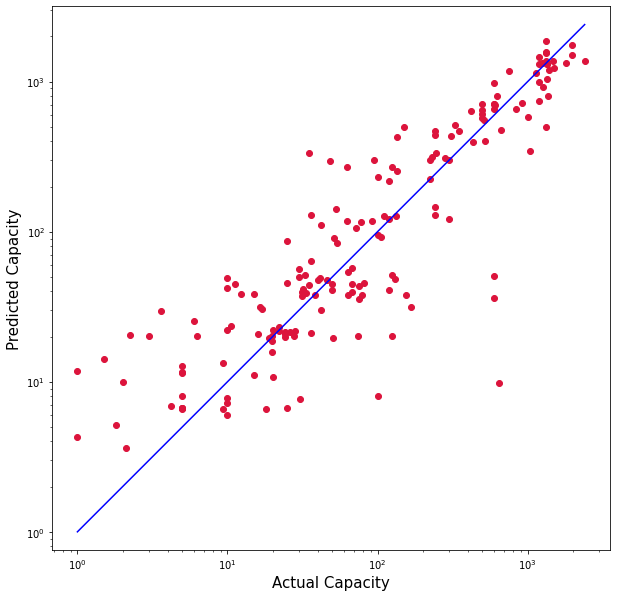

In [74]:
plt.figure(figsize=(10,10))
plt.scatter(a, predRF, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predRF), max(a))
p2 = min(min(predRF), min(a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Capacity', fontsize=15)
plt.ylabel('Predicted Capacity', fontsize=15)
plt.axis('equal')
plt.show()

# ii) primary_fuel:

In [75]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df_new.drop(['primary_fuel'], axis=1)
y=df_new['primary_fuel']
df2=pd.DataFrame(x,columns=x.columns)

x=power_transform(x, method='yeo-johnson')

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.68452141,  1.15902914, -0.94251935, ..., -0.03180053,
        -0.02121617, -0.04501298],
       [ 0.2385238 ,  0.59208084, -0.52236203, ..., -0.03180053,
        -0.02121617, -0.04501298],
       [-0.25895509,  0.12088435, -2.38389273, ..., -0.03180053,
        -0.02121617, -0.04501298],
       ...,
       [-0.49411899, -0.95486367, -0.24766131, ..., -0.03180053,
        -0.02121617, -0.04501298],
       [ 0.12905548,  0.52333628, -0.78203078, ..., -0.03180053,
        -0.02121617, -0.04501298],
       [-0.73157146, -1.80174746,  0.23745683, ..., -0.03180053,
        -0.02121617, -0.04501298]])

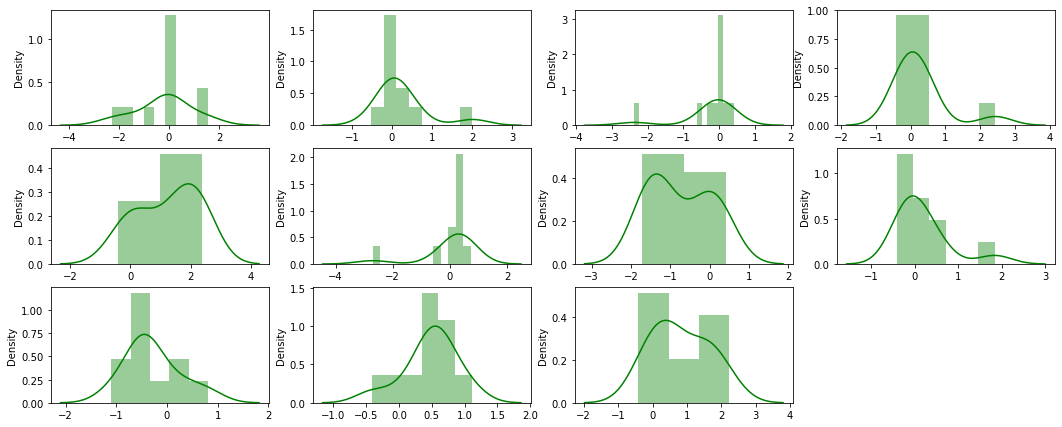

In [77]:
plt.figure(figsize=(18,20))
for i in enumerate(pd.DataFrame(x)):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(pd.DataFrame(x[i[1]]),color='g')

Skewness is removed, let's check the multicolinearity.

# VIF calculation

In [78]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(pd.DataFrame(x).values,i) for i in range(pd.DataFrame(x).shape[1])]
    vif["features"]=df2.columns
    print(vif)
    
vif_calc()  

    VIF Factor             features
0     1.687797          capacity_mw
1     1.084925             latitude
2     1.187842            longitude
3     1.045983          other_fuel1
4     1.231311               source
5     1.557065   geolocation_source
6     3.598049  generation_gwh_2014
7     6.224012  generation_gwh_2015
8     9.953718  generation_gwh_2016
9    10.040193  generation_gwh_2017
10    9.134872  generation_gwh_2018


In [81]:
df2.drop("generation_gwh_2017", axis=1, inplace=True )

In [82]:
x=df2
x=power_transform(x, method='yeo-johnson')
x=sc.fit_transform(x)

In [83]:
vif_calc()  

   VIF Factor             features
0    1.687018          capacity_mw
1    1.084044             latitude
2    1.184921            longitude
3    1.023847          other_fuel1
4    1.230974               source
5    1.556591   geolocation_source
6    3.596623  generation_gwh_2014
7    6.182692  generation_gwh_2015
8    8.608170  generation_gwh_2016
9    4.811398  generation_gwh_2018


As the VIF values are less than 10, we can proceed with the model.

# Finding the best random state

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.7542857142857143 on Random_State 184


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=184)

In [104]:
x_train.shape

(696, 10)

In [105]:
x_test.shape

(175, 10)

In [106]:
y_train.shape

(696,)

In [107]:
y_test.shape

(175,)

# Running Different Algorithms:

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [87]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print('\n')

Accuracy score: of LogisticRegression()
0.7542857142857143
[[ 8  1  0  0  0  0  0]
 [ 3 40  0  5  0  0  2]
 [ 2  4  5  4  1  0  1]
 [ 0  9  1 37  0  0  1]
 [ 0  0  1  1  1  0  0]
 [ 0  0  0  0  0 25  0]
 [ 0  0  0  7  0  0 16]]
              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.74      0.80      0.77        50
           2       0.71      0.29      0.42        17
           3       0.69      0.77      0.73        48
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00        25
           7       0.80      0.70      0.74        23

    accuracy                           0.75       175
   macro avg       0.72      0.68      0.68       175
weighted avg       0.76      0.75      0.74       175

Cross Validation Score: 0.6819901477832512
Difference Between Accuracy Score and CrossValidation Score: 0.07229556650246316


Accuracy score: of SVC()
0.8
[[ 8  1  0  0  0  0 

Random Forest Classifier is giving best accuracy score.

# Hyper Parameter Tuning:

In [88]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

parameters = {'max_depth': np.arange(15,20), 
              'max_features': ['sqrt','auto', 'log2'], 
              'n_estimators': [98,100,102],
              'criterion' :['gini','entropy','log_loss'] }

grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 5)
grid_rf.fit(x,y)

best_params = grid_rf.best_params_
best_score = grid_rf.best_score_

print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
0.8553563218390805


In [93]:
rf1=RandomForestClassifier(max_features ='sqrt', max_depth= 15,criterion= 'entropy',n_estimators=100)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('Accuracy score: of',rf1)
acc=accuracy_score(y_test,predrf1)
print(acc)
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

Accuracy score: of RandomForestClassifier(criterion='entropy', max_depth=15)
0.8457142857142858
[[ 9  0  0  0  0  0  0]
 [ 1 44  2  3  0  0  0]
 [ 1  5  4  6  1  0  0]
 [ 0  6  0 42  0  0  0]
 [ 0  0  2  0  1  0  0]
 [ 0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0 23]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.80      0.88      0.84        50
           2       0.50      0.24      0.32        17
           3       0.82      0.88      0.85        48
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        23

    accuracy                           0.85       175
   macro avg       0.78      0.76      0.76       175
weighted avg       0.83      0.85      0.83       175



# ROC AUC:

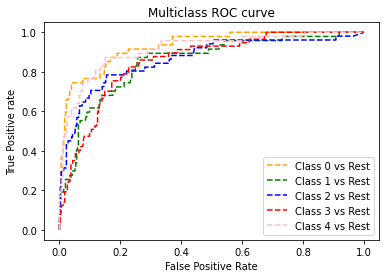

In [112]:
# multi-class classification
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, Y = make_classification(n_samples=1000, n_classes=8, n_features=12, n_informative=10, random_state=184)

# split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=184)

# fit model
clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 4 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   


In [113]:
roc_auc_score(Y_test,pred_prob,multi_class="ovr")

0.8809303392534846

We can see the score is good.We can save the model.

# Model Saving:

In [114]:
import pickle
filename='Primary_fuel.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion:

In [116]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predrf1},index=range(len(a)))
df_com.sample(5)

,original,Predicted
8,0,0
103,6,6
76,3,3
135,6,6
82,3,3
